## Linear Regression

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

The ```create_dataset()``` method allows us to create a customizable synthetic dataset. ```n_samples``` means the number of data points in the dataset, ```n_features``` means the dimension of the input ```X```.

In [47]:
def create_dataset(n_samples=20, n_features=1, noise=0.4):
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)
    return X, y

In [48]:
X, y = create_dataset(n_samples=100, n_features=1, noise=0.6)

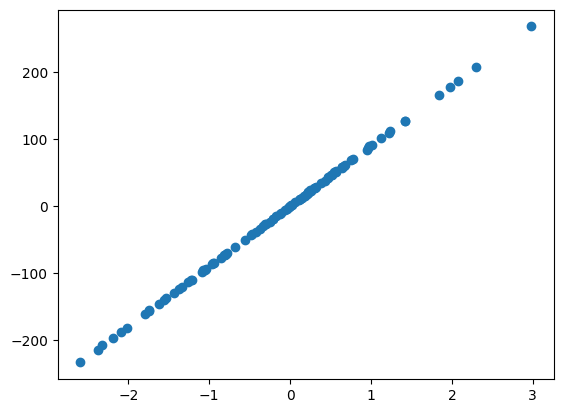

In [49]:
plt.scatter(X, y)
plt.show()

### The ```LinearReg``` Class

Here, we implement the class for our Linear Regression algorithm. Some parts of the code are missing and needed to be filled in. Hints are given throughout the missing codes. Please refer to what has been covered in slides to complete the codes.

In [ ]:
class LinearReg:
    
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.epochs = epochs
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.cost_list = []
        
    def __initial_params(self, shape):
        #initialize weigth and bias as zeros
        
        self.w = np.zeros(shape)
        self.b = 0

        
        return True
        
    def __predictions(self, X):
        return np.dot(X, self.w) + self.b
    
    def __calculate_cost(self, error):
        # MSE = (1/2n) * Σ(y_actual - y_pred)^2  
        # Where: n is the total number of data points.  
        return (np.sum((error)**2)) / (2*len(error))        
  

    def __gradient_descent(self, X, y, y_pred):
        # difference between prediction and actual
        error = y_pred - y
        # calculate cost and append them to list
        cost = self.__calculate_cost(error)
        self.cost_list.append(cost)

        # dw -- gradient of the loss with respect to w, thus same shape as w
        # db -- gradient of the loss with respect to b, thus same shape as b
 
        n = len(y)      
        dw = (1/n)*(np.dot(X.T, error))
        db = (1/n)* np.sum(error)
        return dw, db
    
    def __update_parameters(self, dw, db):
        #update weight and bias with gradients
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return True
    
    def fit(self, X, y):
        """fits the model"""
        self.__initial_params(X.shape[1])
        for _ in range(self.epochs):
            y_pred = self.__predictions(X)
            dw, db,  = self.__gradient_descent(X, y, y_pred)
            self.__update_parameters(dw, db)
        return True
    
    def predict(self, X):
        return self.__predictions(X)
    
    def calculate_rmse(self, y_real, y_pred):
        """returns root mean square error"""
    
        return np.sqrt(np.mean((y_pred - y_real)**2))     
     

    def get_params(self):
        return self.w, self.b
    
    def plot_cost(self):
        """plots the progress of cost on each iteration"""
        plt.title('Cost Function J')
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost_list)
        plt.show()
        
    def calculate_r2(self, X, y):
        """returns r2"""
        sum_squares = 0
        sum_residuals = 0
        y_mean = np.mean(y)
        for i in range(X.shape[0]):
            y_pred = self.__predictions(X[i])
            sum_squares += (y[i] - y_mean) ** 2
            sum_residuals += (y[i] - y_pred) ** 2
        score = 1- (sum_residuals / sum_squares)
        return score

Finally, instantiate an instance of the ```LinearReg``` class, train it on the dataset via ```fit()```, and test its final predictions.

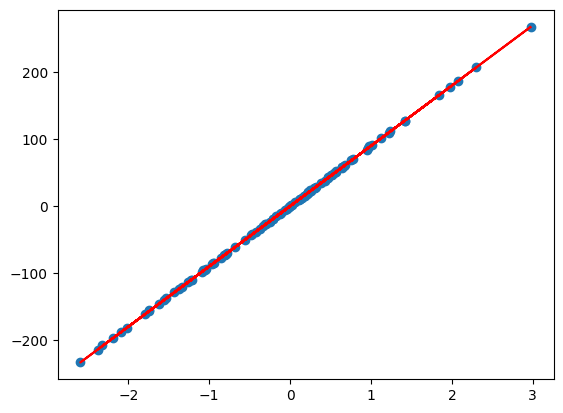

In [51]:
reg = LinearReg(learning_rate=0.01,epochs=10000)
reg.fit(X, y) # fit/train the model

# get predictions
y_pred = reg.predict(X)

# plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### Compare to Built-in Methods

Comparing the Linear Regression algorithm we built to scikit learns algorithm.

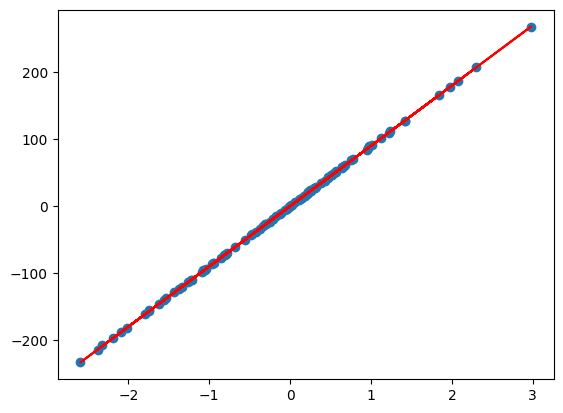

In [52]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()